<a href="https://colab.research.google.com/github/M-Naoya/Study-AI/blob/main/%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%EF%BC%88%E5%89%8D%E7%B7%A8%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 入力層〜中間層


## 概要
入力層〜中間層で登場する要素は以下の通り。
- 入力x：説明変数に相当。
- 重みw：入力xすべてに画一的に同一の重みをかけるのではなく、各入力ごとに重みパラメタを準備する。
- バイアスb：
- 総入力u：Σ(x(i)w(i)) + bで表される。※iは入力層のインデックス。
- 出力z：f(u)で表される。次の層の入力となる。
- 活性化関数f：ステップ関数、シグモイド関数、tanh関数、ReLU関数などの種類がある。

## 確認テスト
- この図式に動物分類の実例を入れてみよう。
  - 足の数
  - 平均体長
  - 変温 or 恒温
  - 産卵する or 産卵しない
  - 肺呼吸 or エラ呼吸
- この数式をPythonで書け。（2分）数式とコード
```
u = np.dot(x, w) + b
```
  - np.dotで行列の内積が求められる。
  - 出力の形は（第1引数の行数, 第2引数の列数）となる。今回の場合は行ベクトルと列ベクトルの内積なので出力はスカラー値となる。

- 確認テスト1-1のファイルから中間層の出力を定義しているソースを抜き出せ。
```
# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)
```



## 実装演習

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# 順伝播（単層・単ユニット）

# 重み
# W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
#b = 0.5

## 試してみよう_数値の初期化
b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)


*** 重み ***
[0. 0.]

*** バイアス ***
0.5376191660579978

*** 入力 ***
[2 3]

*** 総入力 ***
0.5376191660579978

*** 中間層出力 ***
0.5376191660579978



In [ ]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)


#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)

*** 重み ***
[[0.17502507 0.44737155 0.44383892]
 [0.3398964  0.38128047 0.21882512]
 [0.76443657 0.86551723 0.55903037]
 [0.94805521 0.57984431 0.79487252]]

*** バイアス ***
[0.1 0.2 0.3]

*** 入力 ***
[ 1.  5.  2. -1.]

*** 総入力 ***
[2.55532501 3.70496402 2.16115271]

*** 中間層出力 ***
[0.92793044 0.97598958 0.89670637]



In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    #network['W1'] = np.array([
    #    [0.1, 0.3, 0.5],
    #    [0.2, 0.4, 0.6]
    #])

    network["W1"] = np.random.rand(2, 3)

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1のshape", network["W1"].shape)
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )


    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1のshape ***
(2, 3)

*** 重み1 ***
[[0.64799997 0.96706562 0.13295269]
 [0.01304457 0.76389479 0.23228929]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.7740891  2.69485521 0.89753127]

*** 中間層出力1 ***
[0.7740891  2.69485521 0.89753127]

*** 総入力2 ***
[0.98563933 2.39558201]

*** 出力1 ***
[0.7740891  2.69485521 0.89753127]

出力合計: 4.366475577804859


In [ ]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5, 0.2, 0.4],
        [0.2, 0.4, 0.6, 0.2, 0.1],
        [0.2, 0.4, 0.6, 0.2, 0.1]
    ])
    network['W2'] = np.array([
        [0.1, 0.4, 0.7, 1.0],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.6])
    network['b2'] = np.array([0.1, 0.2, 0.3, 0.4])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2., 3.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5 0.2 0.4]
 [0.2 0.4 0.6 0.2 0.1]
 [0.2 0.4 0.6 0.2 0.1]]

*** 重み2 ***
[[0.1 0.4 0.7 1. ]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]]

*** バイアス1 ***
[0.1 0.2 0.3 0.4 0.6]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[1.2 2.5 3.8 1.6 1.5]

*** 中間層出力1 ***
[1.2 2.5 3.8 1.6 1.5]

*** 総入力2 ***
[ 2.63  5.91  9.19 12.47]

*** 出力1 ***
[5.12726816e-05 1.36261113e-03 3.62124437e-02 9.62373672e-01]

出力合計: 1.0

##### 結果表示 #####
*** 出力 ***
[5.12726816e-05 1.36261113e-03 3.62124437e-02 9.62373672e-01]

*** 訓練データ ***
[0 0 0 1]

*** 誤差 ***
0.038352366880824384



In [ ]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    '''network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    '''
    network['W1'] = np.array([
        [0.1, 0.3, 0.5, 0.2, 0.4],
        [0.2, 0.4, 0.6, 0.2, 0.1],
        [0.2, 0.4, 0.6, 0.2, 0.1]
    ])
    network['W2'] = np.array([
        [0.1, 0.4, 0.7, 1.0],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.6])
    network['b2'] = np.array([0.1, 0.2, 0.3, 0.4])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2.,3.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4., 2., 4.])
# 誤差
loss = functions.mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5 0.2 0.4]
 [0.2 0.4 0.6 0.2 0.1]
 [0.2 0.4 0.6 0.2 0.1]]

*** 重み2 ***
[[0.1 0.4 0.7 1. ]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]]

*** バイアス1 ***
[0.1 0.2 0.3 0.4 0.6]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[1.2 2.5 3.8 1.6 1.5]

*** 中間層出力1 ***
[1.2 2.5 3.8 1.6 1.5]

*** 総入力2 ***
[ 2.63  5.91  9.19 12.47]

*** 出力1 ***
[ 2.63  5.91  9.19 12.47]

出力合計: 10.6

##### 結果表示 #####
*** 中間層出力 ***
[1.2 2.5 3.8 1.6 1.5]

*** 出力 ***
[ 2.63  5.91  9.19 12.47]

*** 訓練データ ***
[2. 4. 2. 4.]

*** 誤差 ***
15.935250000000003



# 活性化関数

## 概要
- 活性化関数が非線形でなければいけない。理由は、線形関数を用いた場合、中間層や隠れそうがあったとしても単純パーセプトロンと同じことしかできないから。線形だと多層にする意味がなくなる。
- ステップ関数
  - 特徴：閾値を超えたら発火する関数で出力は1 or 0となる。
  - 課題：線形分離可能なものしか学習できない。
- シグモイド関数
  - 特徴：ステップ関数の課題を解決し、ニューラルネットワークブームの火付け役となった。
  - 課題：勾配消失問題（勾配が小さくなることで学習が進まなくなる問題）が発生する可能性がある。
- ReLU関数
  - 特徴：勾配消失問題の回避、スパース化に貢献している。今最も使われる活性化関数の一つ。
  - 課題：特段なし。

## 確認テスト
- 線形と非線形の違いを図にかいて簡易に説明せよ。
  - y = ax + bのような関数は線形
  - y = a(x - b)**2 + c のような関数は非線形
- 配布されたソースコードより該当する箇所を抜き出せ。
```
z = functions.sigmoid(u)
```


## 実装演習
入力層〜中間層の実装演習でまとめて演習結果を掲載。

# 出力層

## 概要
- 代表的な誤差関数としては、平均二乗誤差、クロスエントロピー誤差、等がある。分類問題では一般的にクロスエントロピー誤差が用いられる。
- 中間層では入力の強弱を閾値の前後で調整するが、出力層では入力の大きさをそのまま出力する。したがって、中間層と出力層では用いられる活性化関数が異なる。出力層で用いられる活性化関数としては、ソフトマックス関数、恒等写像、シグモイド関数等がある。

## 確認テスト
- ・なぜ、引き算でなく二乗するか述べよ
  - 誤差を正の値として表すため。絶対値を取ると微分が面倒などの問題があり、二乗のほうが都合が良い。
- ・下式の1/2はどういう意味を持つか述べよ
  - 二乗和を微分すると2が出てくるが、この2を打ち消し、後続の計算式をスリムにするために1/2を予め乗算している。
- ①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
  - ①
  ```def softmax(x):```
  - ②
  ```np.exp(x) ```
  - ③```np.sum(np.exp(x), axis=0)```
  - 処理の説明：ソフトマックス関数では指数計算がありオーバーフローの可能性があるため、入力値の最大値のみを使う。コード上のnp.maxはそのための処理。
- ①~②の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。
  - ①```defcross_entropy_error(d, y):```
  - ②```-np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size```
  - 処理の説明：1e - 7のような微小な値を足している意味は、np.log(0)となることを防ぐため。このとき-infに発散してしまい、計算が止まってしまう。

## 実装演習
入力層〜中間層の実装演習でまとめて演習結果を掲載。

# 勾配降下法

## 概要
- 勾配降下法には、勾配降下法、確率的勾配降下法、ミニバッチ勾配降下法の3種類が存在する。
  - 勾配降下法：全パラメタを更新する。
  - 確率的勾配降下法：ランダムに抽出したパラメタ一つを更新する。勾配降下法と比較して、データが冗長な場合、計算コストを節約できる、局所解を避けられる等のメリットがある。
  - ミニバッチ勾配降下法：ランダムに分割した集合から一つの集合を抽出してパラメタを更新する。確率的勾配降下法のメリットを引き継ぎつつ、計算資源を有効に使うことができる点がメリットである。
- 学習率はどの程度パラメタを更新するかを示す値で人が設定するハイパーパラメータである。学習率が大きすぎると、解が見つからない、学習率が小さすぎると、解が見つかるまで時間がかかるといった問題が発生するため、適切な学習率を設定することが重要。

## 確認テスト
- 該当するソースコードを探してみよう。（1分）
```network[key]  -= learning_rate * grad[key]```
- オンライン学習とは何か2行でまとめよ
  - オンライン学習とは、ランダムにデータを1個取り出し、パラメタを更新する学習方法のことでバッチ学習と比較して局所解に陥りにくいという利点がある。
- この数式の意味を図に書いて説明せよ。
  - ランダムに取り出したデータ1個に対して、パラメタを更新する学習方法のことを示している。


## 実装演習

##### 結果表示 #####


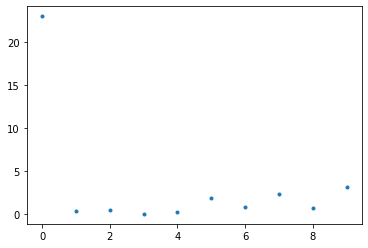

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists[:10], losses[:10], '.')
# グラフの表示
plt.show()

1回目の学習で誤差関数がほぼ0になっていることがわかる。

##### 結果表示 #####


/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2/common/functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


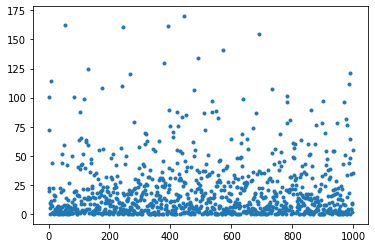

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    #z1 = functions.relu(u1)
    
    ## 試してみよう
    z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    #data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

誤差関数が収束していない。。。

# 誤差逆伝播法

## 概要
誤差逆伝播法は、算出された誤差を出力層側から入力層側へ順に微分し伝播。最小限の計算で各パラメータでの微分値を解析的に計算する手法。最小限の計算が可能になるのは不要な再帰的処理を回避することができるため。出力層で行った微分の結果を、中間層で行う微分計算に再利用することで、重複する計算を何度もする必要がなくなる。

## 確認テスト
- 誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。<br>
```delta2 = functions.d_sigmoid_with_loss(d, y)```
  - 出力層でのデルタをdelta2に保持し、中間層でのデルタ計算時にdelta2を使用することで不要な再帰的計算を避けている。
- 2つの空欄に該当するソースコードを探せ
  - ```delta2 = functions.d_mean_squared_error(d, y)```
  - ```grad['W2'] = np.dot(z1.T, delta2)```

## 実装演習

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')

import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[[1.2 2.5 3.8]]

*** 中間層出力1 ***
[[1.2 2.5 3.8]]

*** 総入力2 ***
[[1.86 4.21]]

*** 出力1 ***
[[0.08706577 0.91293423]]

出力合計: 1.0

##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[ 0.08706577 -0.08706577]]

*** 偏微分_dE/du2 ***
[[-0.02611973 -0.02611973 -0.02611973]]

*** 偏微分_重み1 ***
[[-0.02611973 -0.02611973 -0.02611973]
 [-0.13059866 -0.13059866 -0.13059866]]

*** 偏微分_重み2 ***
[[ 0.10447893 -0.10447893]
 [ 0.21766443 -0.21766443]
 [ 0.33084994 -0.33084994]]

*** 偏微分_バイアス1 ***
[-0.02611973 -0.02611973 -0.02611973]

*** 偏微分_バイアス2 ***
[ 0.08706577 -0.08706577]

##### 結果表示 #####
##### 更新後パラメータ #####
*** 重み1 ***
[[0.1002612  0.3002612  0.5002612 ]
 [0.20130599 0.40130599 0.60130599]]

*** 重み2 ***
[[0.09895521 0.40104479]
 [0.19782336 0.50217664]
 [0.2966915  0.6033085 ]]

*** バイアス1 ***
[0.1002612 0.2002612 0

# 勾配消失問題

## 概要
勾配消失問題とは、勾配が小さくなっていくことでパラメータがほとんど更新されなくなりパラメータが最適値に収束しなくなる問題のことを指す。解決手段としては以下3点がある。
- 活性化関数
  - 活性化関数にReLU関数を用いる。ReLU関数はその形からもわかるようにx>=0の部分だけに注目すると線形関数になっている。つまり微分値はx>=0の範囲であれば一定であり、勾配が消失しにくくなる。
- 重みの初期値設定
  - Xavierの初期値とHeの初期値がある。Xavierでは、重みの要素を、前の層のノード数の平方根で除算した値を初期値として設定し、Heでは、重みの要素を、前の層のノード数の平方根で除算した値に対し√２をかけ合わせた値を初期値として設定する。
- バッチ正規化
  - ミニバッチの単位で入力値のデータの偏りを抑制する方法。実装の際には、活性化関数に値を渡す前後に、バッチ正規化の処理を加える。

## 確認テスト
- 連鎖律の原理を使い、dz/dxを求めよ。z = t**2, t = x +y
  - dz/dx = dz/dt * dt/dx = 2t * 1 = 2t
- シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。
  - シグモイド関数を微分すると、<br>
  ```(1 - 1/(1 + np.exp(-x)) * 1/(1 + np.exp(-x)```となり、x = 0を代入すると、（2）0.25となる。よって答えは（2）
- 重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。
  - 誤差逆伝播法によりすべての重みの値が均一に更新されてしまい、重みが画一的な値となってしまうため。
- 一般的に考えられるバッチ正規化の効果を2点挙げよ。（2分）
  - 学習率を大きく設定することができるため、収束速度が向上する。
  - 正則化効果があるため過学習を抑制する。

In [ ]:
x = 0
print((1 - 1/(1 + np.exp(-x))) * 1/(1 + np.exp(-x)))

0.25


## 実装演習

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')

import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt


class MultiLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size_list: 隠れ層のノード数のリスト
    output_size: 出力層のノード数
    activation: 活性化関数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成, sigmoidとreluのみ扱う
        activation_layer = {'sigmoid': layers.Sigmoid, 'relu': layers.Relu}
        self.layers = OrderedDict() # 追加した順番に格納
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = layers.SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, d):
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]

        return self.last_layer.forward(y, d) + weight_decay

    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        for idx in range(1, self.hidden_layer_num+2):
            grad['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grad['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grad




データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.0958
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.0982
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.0982
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.1
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.16
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.16
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.17
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.08
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generatio

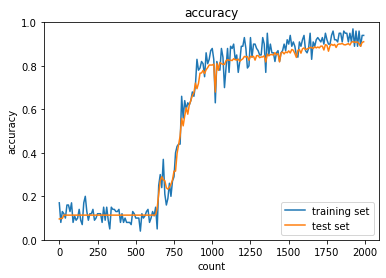

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] hidden_size_listの数字を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.51
                : 10. 正答率(テスト) = 0.4397
Generation: 20. 正答率(トレーニング) = 0.72
                : 20. 正答率(テスト) = 0.6597
Generation: 30. 正答率(トレーニング) = 0.7
                : 30. 正答率(テスト) = 0.7033
Generation: 40. 正答率(トレーニング) = 0.75
                : 40. 正答率(テスト) = 0.7978
Generation: 50. 正答率(トレーニング) = 0.83
                : 50. 正答率(テスト) = 0.8195
Generation: 60. 正答率(トレーニング) = 0.85
                : 60. 正答率(テスト) = 0.8262
Generation: 70. 正答率(トレーニング) = 0.87
                : 70. 正答率(テスト) = 0.8399
Generation: 80. 正答率(トレーニング) = 0.91
                : 80. 正答率(テスト) = 0.8603
Generation: 90. 正答率(トレーニング) = 0.88
                : 90. 正答率(テスト) = 0.85
Generation: 100. 正答率(トレーニング) = 0.91
                : 100. 正答率(テスト) = 0.8633
Generation: 110. 正答率(トレーニング) = 0.92
                : 110. 正答率(テスト) = 0.8602
Generation: 120. 正答率(トレーニング) = 0.91
                : 120. 正答率(テスト) = 0.8638
Generation: 130. 正答率(トレーニング) = 0.94
                : 130. 正答率(テスト) = 0.8837
Generation

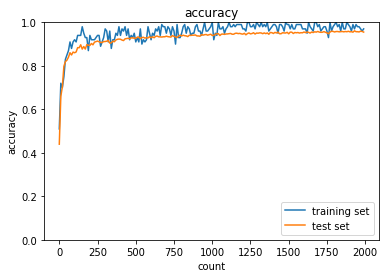

In [ ]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[60, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()



### [try] sigmoid - He と relu - Xavier についても試してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.05
                : 10. 正答率(テスト) = 0.1017
Generation: 20. 正答率(トレーニング) = 0.17
                : 20. 正答率(テスト) = 0.1674
Generation: 30. 正答率(トレーニング) = 0.26
                : 30. 正答率(テスト) = 0.2485
Generation: 40. 正答率(トレーニング) = 0.31
                : 40. 正答率(テスト) = 0.2653
Generation: 50. 正答率(トレーニング) = 0.26
                : 50. 正答率(テスト) = 0.2813
Generation: 60. 正答率(トレーニング) = 0.39
                : 60. 正答率(テスト) = 0.3692
Generation: 70. 正答率(トレーニング) = 0.29
                : 70. 正答率(テスト) = 0.2772
Generation: 80. 正答率(トレーニング) = 0.35
                : 80. 正答率(テスト) = 0.334
Generation: 90. 正答率(トレーニング) = 0.37
                : 90. 正答率(テスト) = 0.4319
Generation: 100. 正答率(トレーニング) = 0.42
                : 100. 正答率(テスト) = 0.4183
Generation: 110. 正答率(トレーニング) = 0.48
                : 110. 正答率(テスト) = 0.4397
Generation: 120. 正答率(トレーニング) = 0.52
                : 120. 正答率(テスト) = 0.4722
Generation: 130. 正答率(トレーニング) = 0.52
                : 130. 正答率(テスト) = 0.5079
Generati

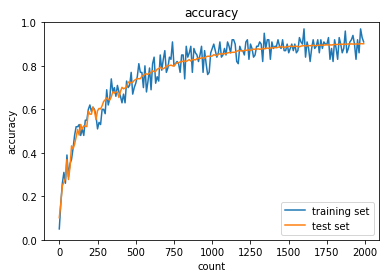

In [ ]:
# sigmoid - He

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.45
                : 10. 正答率(テスト) = 0.3331
Generation: 20. 正答率(トレーニング) = 0.51
                : 20. 正答率(テスト) = 0.4501
Generation: 30. 正答率(トレーニング) = 0.53
                : 30. 正答率(テスト) = 0.507
Generation: 40. 正答率(トレーニング) = 0.65
                : 40. 正答率(テスト) = 0.5433
Generation: 50. 正答率(トレーニング) = 0.78
                : 50. 正答率(テスト) = 0.6455
Generation: 60. 正答率(トレーニング) = 0.83
                : 60. 正答率(テスト) = 0.731
Generation: 70. 正答率(トレーニング) = 0.86
                : 70. 正答率(テスト) = 0.736
Generation: 80. 正答率(トレーニング) = 0.79
                : 80. 正答率(テスト) = 0.8135
Generation: 90. 正答率(トレーニング) = 0.84
                : 90. 正答率(テスト) = 0.8133
Generation: 100. 正答率(トレーニング) = 0.87
                : 100. 正答率(テスト) = 0.8391
Generation: 110. 正答率(トレーニング) = 0.85
                : 110. 正答率(テスト) = 0.8191
Generation: 120. 正答率(トレーニング) = 0.9
                : 120. 正答率(テスト) = 0.858
Generation: 130. 正答率(トレーニング) = 0.9
                : 130. 正答率(テスト) = 0.838
Generation: 14

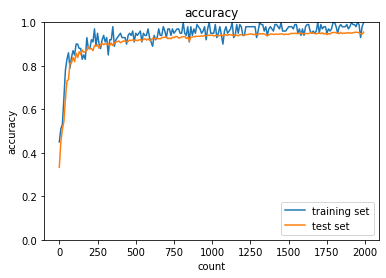

In [ ]:
# ReLU - Xavier
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 学習率最適化手法

## 概要
- 学習率の値が大きい場合、最適値にたどり着かず発散してしまう、学習率の値が小さい場合、収束までに時間がかかってしまうという課題があった。この課題解決のための指針としては、学習初期段階においては学習率を大きくし、徐々に学習率を小さくしていけば良い。学習率の最適化手法としては以下4つがある。
- モメンタム法：物理の速度の考え方を応用した手法。ボールが谷底に転がっていくイメージ。メリットとしては大域的最適解にたどり着けること、谷間についてから最適値にたどり着くまでが早いことがある。
- AdaGrad：勾配の緩やかな斜面に対して、最適値に近づけるメリットがある。ただし、学習率が徐々に小さくなるため鞍点（=勾配ないが最適値ではない点）問題が発生する可能性あり。
- RMSProp：大域的最適解となる、ハイパーパラメータの調整が必要な場合が少ないメリットがある。
- Adam：モメンタムとRMSPropの特徴をあわせた手法であり、両者のメリットを引き継ぐ手法。

## 確認テスト
- モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。（3分）
  - モメンタム法：物理の速度の考え方を応用した手法。ボールが谷底に転がっていくイメージ。メリットとしては大域的最適解にたどり着けること、谷間についてから最適値にたどり着くまでが早いことがある。
  - AdaGrad：勾配の緩やかな斜面に対して、最適値に近づけるメリットがある。ただし、学習率が徐々に小さくなるため鞍点（=勾配ないが最適値ではない点）問題が発生する可能性あり。
  - RMSProp：大域的最適解となる、ハイパーパラメータの調整が必要な場合が少ないメリットがある。

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.08
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.16
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.1
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.11
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.11
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.06
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.08
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.2
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.08
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.15
                : 130. 正答率(テスト) = 0.1135
Generatio

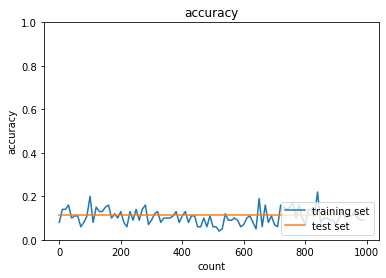

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2/lesson_2')

import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1028
Generation: 60. 正答率(トレーニング) = 0.05
                : 60. 正答率(テスト) = 0.1028
Generation: 70. 正答率(トレーニング) = 0.18
                : 70. 正答率(テスト) = 0.1028
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.08
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.12
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1135
Generat

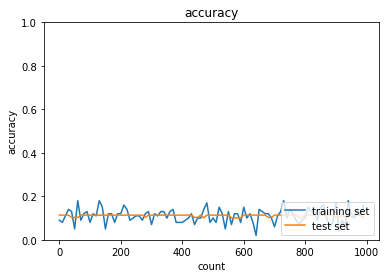

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.07
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.04
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1009
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.1009
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.1009
Generation: 60. 正答率(トレーニング) = 0.1
                : 60. 正答率(テスト) = 0.1009
Generation: 70. 正答率(トレーニング) = 0.07
                : 70. 正答率(テスト) = 0.1009
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1009
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1009
Generation: 100. 正答率(トレーニング) = 0.12
                : 100. 正答率(テスト) = 0.1009
Generation: 110. 正答率(トレーニング) = 0.03
                : 110. 正答率(テスト) = 0.1009
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1009
Generation: 130. 正答率(トレーニング) = 0.06
                : 130. 正答率(テスト) = 0.1009
Generatio

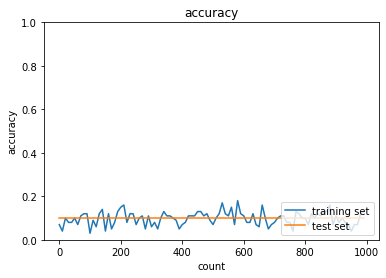

In [ ]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

#momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        #h[key] = momentum * h[key] - learning_rate * grad[key]
        #network.params[key] += h[key]
        h[key] = h[key] + grad[key] * grad[key]
        network.params[key] = network.params[key] - learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.2
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.14
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.38
                : 30. 正答率(テスト) = 0.3119
Generation: 40. 正答率(トレーニング) = 0.3
                : 40. 正答率(テスト) = 0.328
Generation: 50. 正答率(トレーニング) = 0.35
                : 50. 正答率(テスト) = 0.3048
Generation: 60. 正答率(トレーニング) = 0.37
                : 60. 正答率(テスト) = 0.3797
Generation: 70. 正答率(トレーニング) = 0.4
                : 70. 正答率(テスト) = 0.49
Generation: 80. 正答率(トレーニング) = 0.53
                : 80. 正答率(テスト) = 0.516
Generation: 90. 正答率(トレーニング) = 0.67
                : 90. 正答率(テスト) = 0.5931
Generation: 100. 正答率(トレーニング) = 0.65
                : 100. 正答率(テスト) = 0.6409
Generation: 110. 正答率(トレーニング) = 0.68
                : 110. 正答率(テスト) = 0.6611
Generation: 120. 正答率(トレーニング) = 0.73
                : 120. 正答率(テスト) = 0.6972
Generation: 130. 正答率(トレーニング) = 0.82
                : 130. 正答率(テスト) = 0.763
Generation: 140

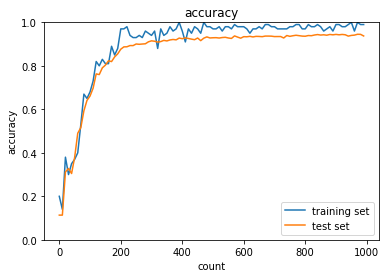

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1032
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1032
Generation: 30. 正答率(トレーニング) = 0.1
                : 30. 正答率(テスト) = 0.1403
Generation: 40. 正答率(トレーニング) = 0.27
                : 40. 正答率(テスト) = 0.2664
Generation: 50. 正答率(トレーニング) = 0.3
                : 50. 正答率(テスト) = 0.2961
Generation: 60. 正答率(トレーニング) = 0.42
                : 60. 正答率(テスト) = 0.3645
Generation: 70. 正答率(トレーニング) = 0.42
                : 70. 正答率(テスト) = 0.4568
Generation: 80. 正答率(トレーニング) = 0.56
                : 80. 正答率(テスト) = 0.4946
Generation: 90. 正答率(トレーニング) = 0.59
                : 90. 正答率(テスト) = 0.5753
Generation: 100. 正答率(トレーニング) = 0.59
                : 100. 正答率(テスト) = 0.6203
Generation: 110. 正答率(トレーニング) = 0.62
                : 110. 正答率(テスト) = 0.6561
Generation: 120. 正答率(トレーニング) = 0.65
                : 120. 正答率(テスト) = 0.6776
Generation: 130. 正答率(トレーニング) = 0.72
                : 130. 正答率(テスト) = 0.7198
Generatio

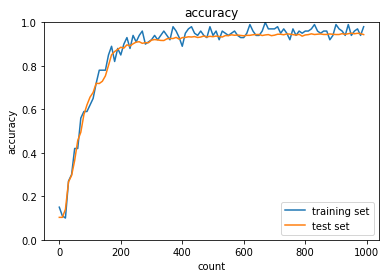

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 過学習

## 概要
過学習は、訓練データにモデルを過度に最適化させてしまい、訓練データに対しては高い予測精度となるが、未知のデータに対しては低い予測精度となる問題のこと。訓練データが少ない場合やモデルの表現度が高すぎる場合にこの問題が生じることがある。対策として正則化、ドロップアウトがある。
- 正則化：ネットワークの自由度を制約することにより過学習を抑制する。L1正則化（Lasso回帰）とL2正則化（Ridge回帰）があり、前者は重みが0になることがあるのに対し、後者は重みが0になることはない（0に限りなく近づくことはある）。
- ドロップアウト：ランダムにノードを削除して学習させる手法。これによりノード数が多いという過学習の課題を解消できる。メリットとしてはデータ量を変化させずに、異なるモデルを学習させているという解釈が可能なこと。



## 確認テスト
- リッジ回帰の特徴として正しいものを選択しなさい。
  - （a）ハイパーパラメータを大きな値に設定すると、すべての重みが限りなく0に近づく、が正しい。
  - リッジ回帰の場合、重みが0に近づくことがあっても0になることはない。一方でLasso回帰では重みは0になりうる。
- 下図について、L1正則化を表しているグラフはどちらか答えよ。
  - L1正則化はLasso回帰なので右グラフが正しい。

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.0947
Generation: 20. 正答率(トレーニング) = 0.17666666666666667
                : 20. 正答率(テスト) = 0.138
Generation: 30. 正答率(トレーニング) = 0.27
                : 30. 正答率(テスト) = 0.2041
Generation: 40. 正答率(トレーニング) = 0.35
                : 40. 正答率(テスト) = 0.2491
Generation: 50. 正答率(トレーニング) = 0.4033333333333333
                : 50. 正答率(テスト) = 0.2701
Generation: 60. 正答率(トレーニング) = 0.5266666666666666
                : 60. 正答率(テスト) = 0.3677
Generation: 70. 正答率(トレーニング) = 0.5733333333333334
                : 70. 正答率(テスト) = 0.4172
Generation: 80. 正答率(トレーニング) = 0.6433333333333333
                : 80. 正答率(テスト) = 0.4633
Generation: 90. 正答率(トレーニング) = 0.66
                : 90. 正答率(テスト) = 0.4986
Generation: 100. 正答率(トレーニング) = 0.6933333333333334
                : 100. 正答率(テスト) = 0.535
Generation: 110. 正答率(トレーニング) = 0.7633333333333333
                : 110. 正答率(テスト) = 0.5752
Generation: 120. 正答率(トレーニング) = 0.8166666666666667

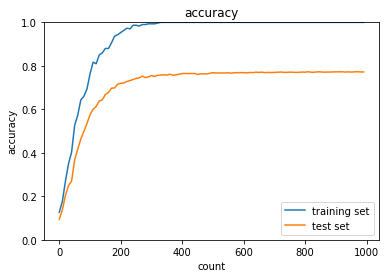

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2/lesson_2')

import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう


データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.46
                : 10. 正答率(テスト) = 0.3595
Generation: 20. 正答率(トレーニング) = 0.32666666666666666
                : 20. 正答率(テスト) = 0.2788
Generation: 30. 正答率(トレーニング) = 0.4633333333333333
                : 30. 正答率(テスト) = 0.3692
Generation: 40. 正答率(トレーニング) = 0.37333333333333335
                : 40. 正答率(テスト) = 0.277
Generation: 50. 正答率(トレーニング) = 0.39
                : 50. 正答率(テスト) = 0.2962
Generation: 60. 正答率(トレーニング) = 0.16
                : 60. 正答率(テスト) = 0.1596
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
     

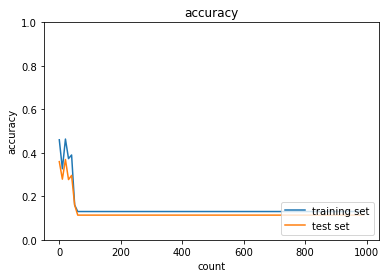

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.02
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### optimizerとdropout_ratioの値を変更してみよう
SGD→Adam、0.15→0.3にそれぞれ変更

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18
                : 10. 正答率(テスト) = 0.1471
Generation: 20. 正答率(トレーニング) = 0.21
                : 20. 正答率(テスト) = 0.1863
Generation: 30. 正答率(トレーニング) = 0.22
                : 30. 正答率(テスト) = 0.1945
Generation: 40. 正答率(トレーニング) = 0.26
                : 40. 正答率(テスト) = 0.2282
Generation: 50. 正答率(トレーニング) = 0.2833333333333333
                : 50. 正答率(テスト) = 0.2544
Generation: 60. 正答率(トレーニング) = 0.24666666666666667
                : 60. 正答率(テスト) = 0.223
Generation: 70. 正答率(トレーニング) = 0.3
                : 70. 正答率(テスト) = 0.2466
Generation: 80. 正答率(トレーニング) = 0.27666666666666667
                : 80. 正答率(テスト) = 0.2391
Generation: 90. 正答率(トレーニング) = 0.32
                : 90. 正答率(テスト) = 0.2684
Generation: 100. 正答率(トレーニング) = 0.3566666666666667
                : 100. 正答率(テスト) = 0.2804
Generation: 110. 正答率(トレーニング) = 0.4633333333333333
                : 110. 正答率(テスト) = 0.3788
Generation: 120. 正答率(トレーニング) = 0.4866666666666667
                : 120. 正答率(テスト) = 0.4024


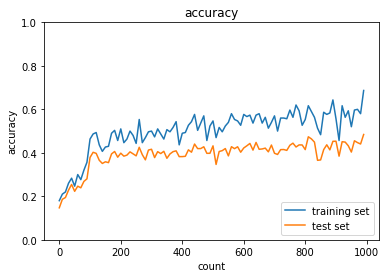

In [ ]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.4
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.Adam(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## 関連記事
- 本セクションで学んだRidge回帰、Lasso回帰以外の正則化の手法として、Elastic Netがある。Elastic NetはRidgeとLassoの折衷案で、L1正則化項とL2正則化項の両方を持っている。Lassoのモデルで取り込める説明変数に制限があるという課題の解決を図ったモデルである。
https://aizine.ai/ridge-lasso-elasticnet/　　参照

# 畳み込みニューラルネットワークの概念

## 概要
- 畳み込み層は、3次元の空間情報も学習できるような層のこと。画像の場合、縦、横、チャンネルの3次元のデータを学習し、次に伝える必要があり、この畳み込み層を利用する。
- フィルターは全結合でいうところの重みを指す。バイアスの概念も存在する。
- パディングとは畳み込み層の処理を行う前に入力データの周囲を固定のデータで埋めることを指す。0でも0以外でも固定の値であればよい。
- ストライドは、フィルターをどれくらいの幅でずらしていくかを表す。
- チャンネルは、グレースケール画像の場合1チャンネルになる。
- 全結合層で画像を学習した場合、本来3次元のデータを1次元のデータとして処理されるため、RGBの各チャンネル間の関連性が失われ学習に反映されないという課題がある。
- プーリング層では入力層のデータ量から詳細情報を消す層である。メリットとしては計算量を大幅に減らせること、画像内のズレやノイズに対処しやすくなることなどがある。averageプーリング、maxプーリング等の種類がある。

## 確認テスト
- サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。
  - パディング1なので入力画像は8×8になる。出力画像のサイズは7×7になる。

## 実装演習

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/MyDrive/002_Work/002_Study-AI/003_深層学習（前編）/DNN_code_colab_lesson_1_2/lesson_2')

import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    
    #col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col


### [try] im2colの処理を確認しよう
- 関数内でtransposeの処理をしている行をコメントアウトして下のコードを実行してみよう
- input_dataの各次元のサイズやフィルターサイズ・ストライド・パディングを変えてみよう

In [ ]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 4
filter_w = 4
stride = 2
pad = 1
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')

========== input_data ===========
 [[[[80. 85. 24. 44.]
   [73. 92. 80. 75.]
   [33. 46. 14. 18.]
   [57. 24. 53. 93.]]]


 [[[96. 68. 59. 75.]
   [88. 41. 70. 37.]
   [57. 13.  0.  3.]
   [81. 25. 83. 79.]]]]
============= col ==============
 [[ 0.  0.  0. 92.  0.  0. 73. 80.  0.  0. 92. 75.  0.  0. 80.  0.]
 [ 0. 85.  0. 46. 80. 24. 33. 14. 85. 44. 46. 18. 24.  0. 14.  0.]
 [ 0. 92.  0. 24. 73. 80. 57. 53. 92. 75. 24. 93. 80.  0. 53.  0.]
 [ 0. 46.  0.  0. 33. 14.  0.  0. 46. 18.  0.  0. 14.  0.  0.  0.]
 [ 0.  0.  0. 41.  0.  0. 88. 70.  0.  0. 41. 37.  0.  0. 70.  0.]
 [ 0. 68.  0. 13. 96. 59. 57.  0. 68. 75. 13.  3. 59.  0.  0.  0.]
 [ 0. 41.  0. 25. 88. 70. 81. 83. 41. 37. 25. 79. 70.  0. 83.  0.]
 [ 0. 13.  0.  0. 57.  0.  0.  0. 13.  3.  0.  0.  0.  0.  0.  0.]]


In [ ]:
# ２次元配列を画像データに変換
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_shape
    # 切り捨て除算    
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [ ]:
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


In [ ]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 行ごとに最大値を求める
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        # 整形
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


In [ ]:
class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

# 最新のCNN

## 概要
- AlexNetのモデル構造：5層の畳み込みそうおよびプーリング層など、それに続く3層の全結合層から構成される。
- 画像分類コンテストで過去の優勝モデルの成績を大きく上回る精度を誇り、注目されたモデル構造。それまでは人が画像から特徴量を抽出し、その特徴量を用いて画像の分類を行っていたが、AlexNetでは機械自身が特徴量を抽出している点が新しかった。
- 活性化関数としてはReLU関数が採用されている。
- データが少ない場合の対処法として、画像データを反転したり回転したりすることで、画像を水増しする手法も用いられていた。

https://buildersbox.corp-sansan.com/entry/2019/11/08/110000　　参照

## 確認テスト
本sectionではなし。


## 実装演習
本sectionではなし。

## 関連記事
- 以下記事においてはAlexNetが世界的な画像分類コンテスト、ILSVRC 2012で驚異の成績を誇り優勝したこと、そこから画像認識の分野の研究が更に進展したこと等が解説されている。AlexNetはその後更に改良され、新たなモデルが研究されていることがわかる。
https://ainow.ai/2020/02/14/182978/　　参照